In [1]:
import numpy as np
import pandas as pd

import re

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('diabetes.csv')
data = data[['Diabetes_binary','HighBP','HighChol','Smoker', 'HvyAlcoholConsump','DiffWalk']]
data.rename(columns={"Diabetes_binary":"D","HighBP":"P", "HighChol":"C", "HvyAlcoholConsump":"A", "DiffWalk":"DC", "Smoker":"F"}, inplace=True)

In [3]:
data

,D,P,C,F,A,DC
0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
253675,0.0,1.0,1.0,0.0,0.0,0.0
253676,1.0,1.0,1.0,0.0,0.0,1.0
253677,0.0,0.0,0.0,0.0,0.0,0.0
253678,0.0,1.0,0.0,0.0,0.0,0.0


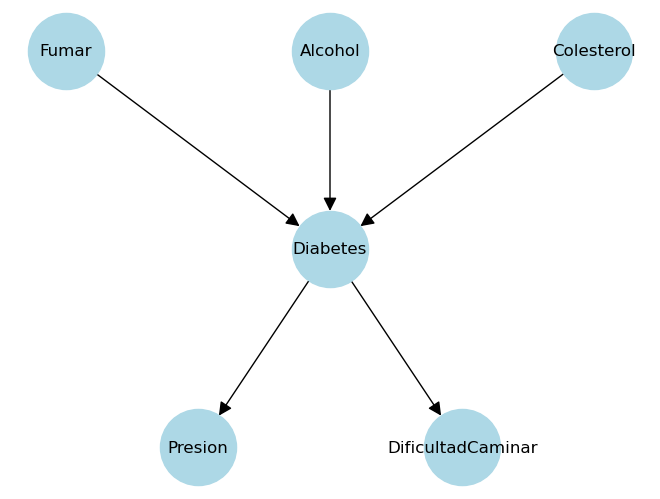

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ('Fumar','Diabetes'), 
    ('Alcohol','Diabetes'), 
    ('Colesterol','Diabetes'), 
    ('Diabetes','Presion'), 
    ('Diabetes','DificultadCaminar')
])

# Posiciones: (x, y)
pos = {
    'Fumar': (-1, 2),
    'Alcohol': (0, 2),
    'Colesterol': (1, 2),
    'Diabetes': (0, 1),
    'Presion': (-0.5, 0),
    'DificultadCaminar': (0.5, 0)
}

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', arrowsize=20)
plt.show()


# Calculo de probabilidades con frecuencia

Probabilidad de fumar y ser alcoholico


$$
P(A) \approx \frac{\text{Número de veces que ocurre } A}{\text{Número total de observaciones}}
$$

 

In [ ]:
probabilidad_fumar = data.F.sum()/len(data)
probabilidad_alcoholico = data.A.sum()/len(data)

In [ ]:
print("Probailidad fumar", np.round(probabilidad_fumar,4))
print("Probailidad alcoholico", np.round(probabilidad_alcoholico,4))

Probailidad fumar 0.4432
Probailidad alcoholico 0.0562


Probabilidad de diabetes dado fumar y ser alcoholico

Datos que cumplen las condiciones de la tabla

In [ ]:
fumar_T_alcholico_T = data.loc[(data.F == 1.0) & (data.A == 1.0)]
fumar_T_alcholico_F = data.loc[(data.F == 1.0) & (data.A == 0)]
fumar_F_alcholico_T = data.loc[(data.F == 0) & (data.A == 1.0)]
fumar_F_alcholico_F = data.loc[(data.F == 0) & (data.A == 0)]

Probabilidad de cada combinación dada su frecuencia en los datos

In [ ]:
probabilidad_diabetes_fumar_T_alcholico_T = fumar_T_alcholico_T.D.sum()/len(fumar_T_alcholico_T)
probabilidad_diabetes_fumar_T_alcholico_F = fumar_T_alcholico_F.D.sum()/len(fumar_T_alcholico_F)
probabilidad_diabetes_fumar_F_alcholico_T = fumar_F_alcholico_T.D.sum()/len(fumar_F_alcholico_T)
probabilidad_diabetes_fumar_F_alcholico_F = fumar_F_alcholico_F.D.sum()/len(fumar_F_alcholico_F)

In [ ]:
print("F  A  | P(D)")
print("--------------")
print("T  T  |",np.round(probabilidad_diabetes_fumar_T_alcholico_T,4))
print("T  F  |",np.round(probabilidad_diabetes_fumar_T_alcholico_F,4))
print("F  T  |",np.round(probabilidad_diabetes_fumar_F_alcholico_T,4))
print("F  F  |",np.round(probabilidad_diabetes_fumar_F_alcholico_F,4))

F  A  | P(D)
--------------
T  T  | 0.0668
T  F  | 0.1716
F  T  | 0.0427
F  F  | 0.1234


Calculo de la probabilidad total de tener diabetes, es decir, todas las combinaciones en las que puede pasar.

In [ ]:
probabilidad_diabetes = probabilidad_diabetes_fumar_T_alcholico_T * probabilidad_fumar * probabilidad_alcoholico + \
                        probabilidad_diabetes_fumar_T_alcholico_F * probabilidad_fumar * (1 - probabilidad_alcoholico) + \
                        probabilidad_diabetes_fumar_F_alcholico_T * (1 - probabilidad_fumar) * probabilidad_alcoholico + \
                        probabilidad_diabetes_fumar_F_alcholico_F * (1 - probabilidad_fumar) * (1 - probabilidad_alcoholico) 

In [ ]:
print("Probailidad diabetes", np.round(probabilidad_diabetes,4))

Probailidad diabetes 0.1396


Probabilidad de los sintomas dado la diabetes



In [ ]:
diabetes_T = data.loc[(data.D == 1.0)]
diabetes_F = data.loc[(data.D == 0)]

Probabilidades condicionales dadas las frecuencias

In [ ]:
probabilidad_diabetes_T_presion_T = diabetes_T.P.sum()/len(diabetes_T)
probabilidad_diabetes_F_presion_T = diabetes_F.P.sum()/len(diabetes_F)

probabilidad_diabetes_T_colesterol_T = diabetes_T.C.sum()/len(diabetes_T)
probabilidad_diabetes_F_colesterol_T = diabetes_F.C.sum()/len(diabetes_F)

probabilidad_diabetes_T_diffcaminar_T = diabetes_T.DC.sum()/len(diabetes_T)
probabilidad_diabetes_F_diffcaminar_T = diabetes_F.DC.sum()/len(diabetes_F)


In [ ]:
print("D  |  P(P)  |  P(C)  |  P(DC) ")
print("------------------------------")
print("T  |",np.round(probabilidad_diabetes_T_presion_T,4),'|',np.round(probabilidad_diabetes_T_colesterol_T,4),'|',np.round(probabilidad_diabetes_T_diffcaminar_T,4))
print("F  |",np.round(probabilidad_diabetes_F_presion_T,4),'|',np.round(probabilidad_diabetes_F_colesterol_T,4),'|',np.round(probabilidad_diabetes_F_diffcaminar_T,4))


D  |  P(P)  |  P(C)  |  P(DC) 
------------------------------
T  | 0.7527 | 0.6701 | 0.3712
F  | 0.3766 | 0.3843 | 0.1354


In [ ]:
probabilidad_presion = probabilidad_diabetes_T_presion_T * probabilidad_diabetes + probabilidad_diabetes_F_presion_T * (1 - probabilidad_diabetes)
probabilidad_colesterol = probabilidad_diabetes_T_colesterol_T * probabilidad_diabetes + probabilidad_diabetes_F_colesterol_T * (1 - probabilidad_diabetes)
probabilidad_diffcaminar = probabilidad_diabetes_T_diffcaminar_T * probabilidad_diabetes + probabilidad_diabetes_F_diffcaminar_T * (1 - probabilidad_diabetes)

In [ ]:
print("Probabilidad presion alta", np.round(probabilidad_presion,4))
print("Probabilidad colesterol alto", np.round(probabilidad_colesterol,4))
print("Probabilidad dificultad para caminar", np.round(probabilidad_diffcaminar,4))

Probabilidad presion alta 0.4291
Probabilidad colesterol alto 0.4242
Probabilidad dificultad para caminar 0.1683
